<a href="https://colab.research.google.com/github/huzaifakarbalai/DataWrangling_Python/blob/main/data_wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import missingno as msno
data = pd.read_excel("/content/sample_data/dirtydata.xlsx","Sheet 1")

data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,total,Products
0,2011-01-01 00:00:00,1.0,0,0.0,1.0,9.84,14.395,81.0,0,3.0,13.0,16,1.0,abc
1,2011-01-01 01:00:00,1.0,0,0.0,1.0,9.02,13.635,80.0,0,8.0,32.0,40,2.0,abc
2,2011-01-01 02:00:00,1.0,0,0.0,1.0,9.02,13.635,80.0,0,5.0,27.0,32,3.0,abc
3,2011-01-01 03:00:00,1.0,0,0.0,1.0,9.84,14.395,75.0,0,3.0,10.0,13,NaN,abc
4,2011-01-01 04:00:00,1.0,0,0.0,1.0,9.84,14.395,75.0,0,0.0,1.0,1,NaN,abc


In [ ]:
#check data type
data.dtypes

datetime       object
season        float64
holiday        object
workingday    float64
weather       float64
temp          float64
atemp         float64
humidity      float64
windspeed      object
casual        float64
registered    float64
count          object
total         float64
Products       object
dtype: object

Checking for missing values


In [ ]:
#checking data for null values
data.isnull().sum()

datetime          4
season            9
holiday           7
workingday        8
weather           7
temp             10
atemp             7
humidity         13
windspeed        12
casual            8
registered        9
count            11
total         10883
Products          7
dtype: int64

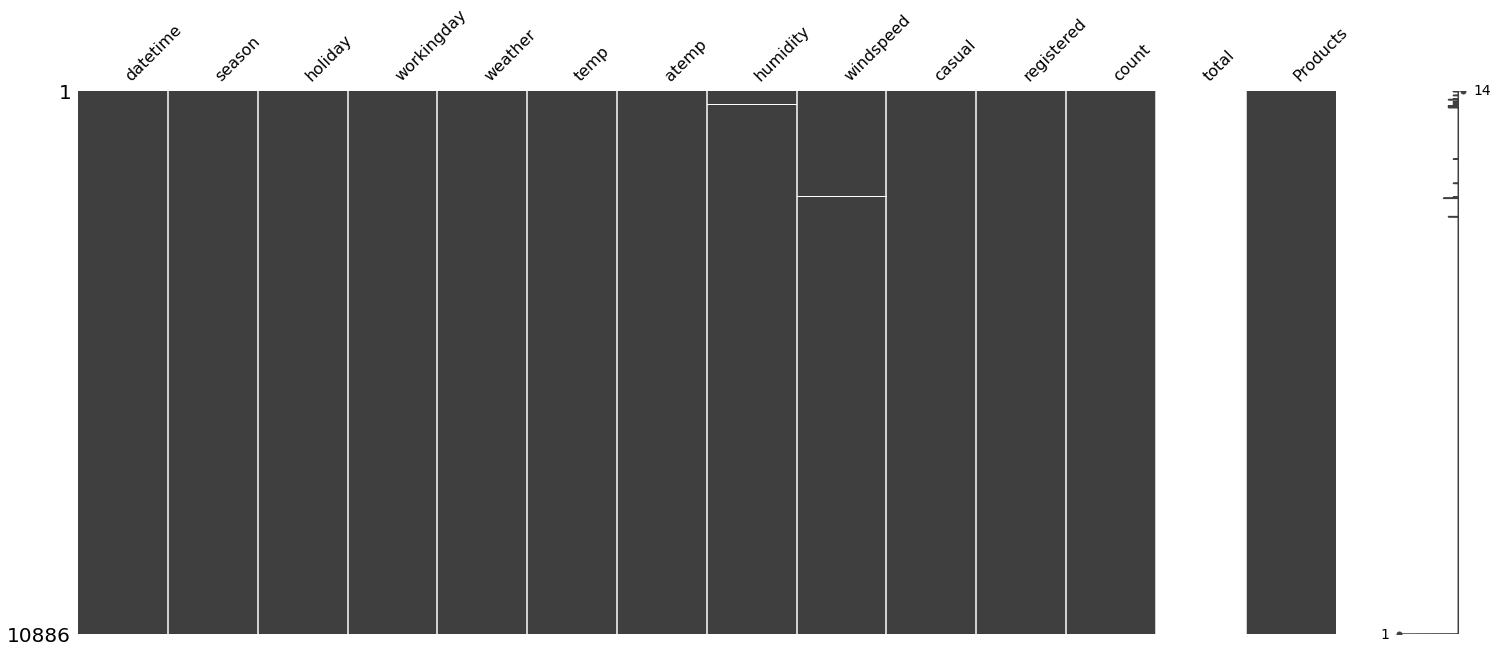

In [ ]:
#check the pattern of missing values
msno.matrix(data)

Deleting the column with missing data

In [ ]:
updated_data = data.dropna(axis=1)
updated_data.isnull().sum()

Series([], dtype: float64)

Deleting the row with missing data

In [ ]:
updated_df = data.dropna(axis=0)
updated_data.isnull().sum()

Series([], dtype: float64)

Filling the missing data with the mean or median value if it’s a numerical variable.

In [ ]:
updated_da = data
updated_da['workingday']=updated_da['workingday'].fillna(updated_da['workingday'].mean())
updated_da['temp']=updated_da['temp'].fillna(updated_da['temp'].median())
updated_da.isnull().sum()

datetime                 4
season                   9
holiday                  7
workingday               0
weather                  7
temp                     0
atemp                    7
humidity                13
windspeed               12
casual                   8
registered               9
count                   11
total                10883
Products                 7
seasonismissing      10883
humidityismissing        0
dtype: int64

Replacing mistyped values from the columns

In [ ]:
updated_da['windspeed'] = updated_da['windspeed'].str.replace('why not','')
updated_da = updated_da.drop(["windspeed","count","Products"],axis=1)

Imputation with an additional column

In [ ]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(strategy = 'median')
updated_da[['casual']] = my_imputer.fit_transform(data[['casual']])
updated_da.isnull().sum()

season                 9
workingday             0
weather                7
temp                   0
atemp                  7
humidity              13
casual                 0
registered             9
total              10883
casualismissing        0
dtype: int64

Outlier Detection

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


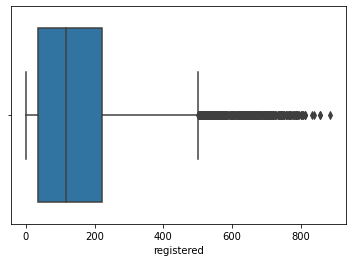

In [ ]:
import seaborn as sns
sns.boxplot(data['registered'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


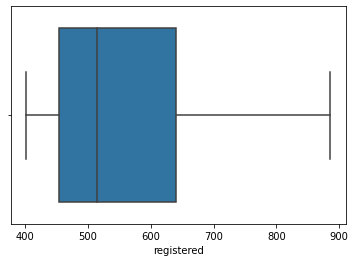

In [ ]:
df = updated_da[updated_da['registered'] > 400] # Removing rows with registered less than 500
sns.boxplot(df['registered'])

Desciptive Analysis

In [ ]:
data.describe()

,season,workingday,weather,temp,atemp,humidity,casual,registered,total
count,10877.000000,10886.000000,10879.000000,10886.000000,10879.000000,10873.000000,10878.000000,10877.000000,3.0
mean,2.505930,0.680732,1.418697,20.207369,23.658606,61.899108,36.036404,155.477889,2.0
std,1.115806,0.466043,0.633954,8.150370,8.476089,19.250743,49.974707,150.992331,1.0
min,1.000000,0.000000,1.000000,-200.000000,0.760000,0.000000,0.000000,0.000000,1.0
25%,2.000000,0.000000,1.000000,13.940000,16.665000,47.000000,4.000000,36.000000,1.5
50%,3.000000,1.000000,1.000000,20.500000,24.240000,62.000000,17.000000,118.000000,2.0
75%,4.000000,1.000000,2.000000,26.240000,31.060000,77.000000,49.000000,222.000000,2.5
max,4.000000,1.000000,4.000000,41.000000,45.455000,100.000000,367.000000,886.000000,3.0


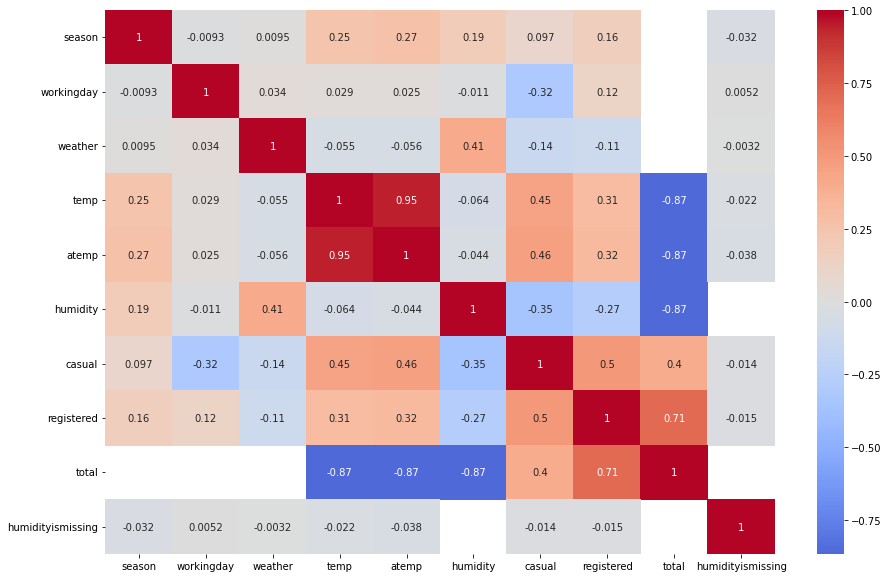

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10)) 
sns.color_palette(as_cmap=True)
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center = 0)

Insight 1: Weather has a good correlation with humidity which is logical


Insight 2: Temp and season also has a good positive correlation

Inferential Analysis

T-Test

In [ ]:
import numpy as np
from scipy import stats
def get_num_cols(df):
    types_map = df.dtypes.to_dict()
    num_columns = []
    for k,v in types_map.items():
        if np.issubdtype(np.int64, v) or np.issubdtype(np.float64, v):
            num_columns.append(k)

    print(num_columns)
    return num_columns

def t_test(df):
    num_columns = get_num_cols(df)
    for i in range(len(num_columns)-1):
        print("\n --------"+num_columns[i]+"--------")
        for j in range(i+1,len(num_columns)):
            col1 = num_columns[i]
            col2 = num_columns[j]
            t_val, p_val = stats.ttest_ind(df[col1], df[col2])
            print("(%s,%s) => t-value=%s, p-value=%s" % (num_columns[i], num_columns[j], str(t_val), str(p_val)))
            # interpret p-value
            alpha = 0.05
            #print('significance=%.3f, p=%.3f' % (alpha, p_val))
            if p_val <= alpha:
                print('Dependent (reject H0)')
            else:
                print('Independent (fail to reject H0)')

In [ ]:
t_test(data)

['season', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'casual', 'registered', 'total']

 --------season--------
(season,workingday) => t-value=nan, p-value=nan
Independent (fail to reject H0)
(season,weather) => t-value=nan, p-value=nan
Independent (fail to reject H0)
(season,temp) => t-value=nan, p-value=nan
Independent (fail to reject H0)
(season,atemp) => t-value=nan, p-value=nan
Independent (fail to reject H0)
(season,humidity) => t-value=nan, p-value=nan
Independent (fail to reject H0)
(season,casual) => t-value=nan, p-value=nan
Independent (fail to reject H0)
(season,registered) => t-value=nan, p-value=nan
Independent (fail to reject H0)
(season,total) => t-value=nan, p-value=nan
Independent (fail to reject H0)

 --------workingday--------
(workingday,weather) => t-value=nan, p-value=nan
Independent (fail to reject H0)
(workingday,temp) => t-value=-249.56027219688238, p-value=0.0
Dependent (reject H0)
(workingday,atemp) => t-value=nan, p-value=nan
Independent (fail to 

Chi-Square Test

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def chi_square_test(cat_cols, df):
    for i in range(len(cat_cols)-1):
        print("\n\t --------"+cat_cols[i]+"--------")
        for j in range(i+1,len(cat_cols)):
            cat_var1 = cat_cols[i]
            cat_var2 = cat_cols[j]
            data_crosstab = pd.crosstab(df[cat_var1], df[cat_var2], margins = False) 
            print(data_crosstab) 

            stat, p, dof, expected = chi2_contingency(data_crosstab)
            print('dof=%d' % dof)
            print(expected)

    # interpret p-value
            alpha = 0.05
            print('significance=%.3f, p=%.3f' % (alpha, p))
            if p <= alpha:
                print('Dependent (reject H0)')
            else:
                print('Independent (fail to reject H0)')
            print("\n")

ANOVA

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

def anova_test(num_cols, cat_cols, df):
    for i in range(len(num_cols)-1):   
        num_col = num_cols[i]
        for j in range(len(cat_cols)-1):
            cat_col = cat_cols[j]
            mod = ols(num_col+" ~ "+cat_col,data=df).fit()
            aov_table=sm.stats.anova_lm(mod, typ=2)
            print ("\nANOVA => "+num_col+" - "+cat_col)
            print(aov_table)
            print()

Tukey Test

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def tukeyhsd_test(num_cols, cat_cols, df):
    for i in range(len(num_cols)-1):
        num_var = num_cols[i]
        print("\t-------------"+num_var+"-------------")
        for j in range(len(cat_cols)-1):
            cat_var = cat_cols[j]
            tukey = pairwise_tukeyhsd(endog=df[num_var], groups=df[cat_var], alpha=0.05)
            #display results
            
            print(cat_var)
            print(tukey)
            print()